In [4]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

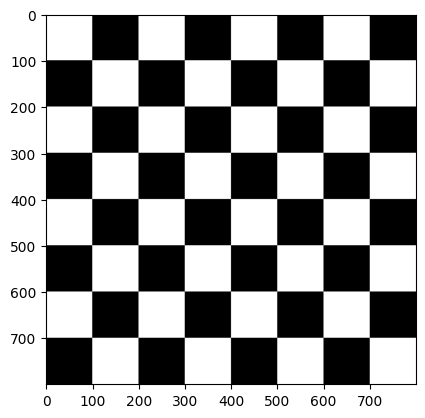

In [5]:
alto_ajedrez = 800
ancho_ajedrez = 800
ajedrez_img = np.zeros((alto_ajedrez,ancho_ajedrez,1), dtype=np.uint8)

par=0

for n in range(0,800,100):
    for salteado in range(4):
        ajedrez_img[salteado*100+par:salteado*100+par+100,n:n+100,0] = 255
        par += 100
    if par == 400:
        par = 100
    else:
        par = 0

plt.imshow(ajedrez_img,cmap='gray')
plt.show()

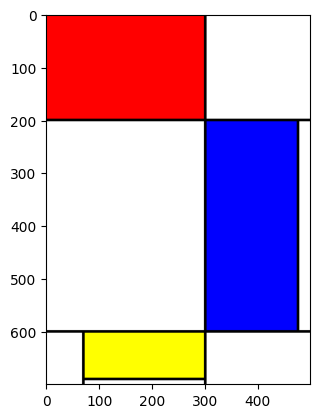

In [6]:
color_img = np.zeros((700, 500, 3), dtype = np.uint8)
color_img[:,:,:] = 255
cv2.rectangle(color_img, (0,0), (300,200), (255,0,0), -1)

cv2.rectangle(color_img, (300,200), (475,600), (0,0,255), -1)

cv2.rectangle(color_img, (70,600), (300,690), (255,255,0), -1)

cv2.line(color_img, (300,0),(300,700),(0,0,0), 3)
cv2.line(color_img, (475,200),(475,600),(0,0,0), 3)

cv2.line(color_img, (0,200),(500,200),(0,0,0), 3)

cv2.line(color_img, (0,600),(500,600),(0,0,0),3)
cv2.line(color_img, (70,600),(70,700),(0,0,0),3)
cv2.line(color_img, (70,690),(300,690),(0,0,0),3)

plt.imshow(color_img) 
plt.show()


In [7]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        #Dimensiones imagen de entrada
        h, w, c = frame.shape
        #Concateamos en horizontal los tres planos del fotograma

        b = 50 -b
        collage = np.hstack((r, g, b))
    
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('RGB', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

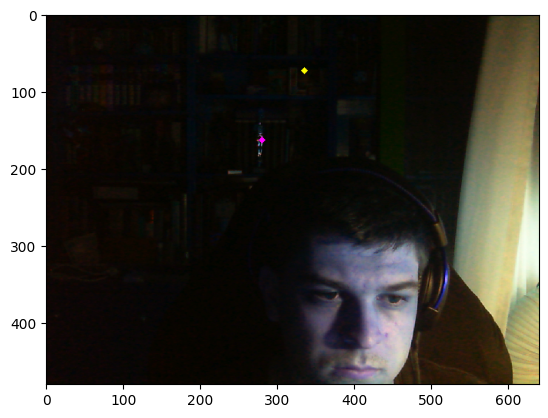

In [8]:
def mouse_events(event, x, y, flags, params):
    global px, py, R, G, B
    px = -1
    # Movimiento del puntero     
    if event==cv2.EVENT_MOUSEMOVE:
        #Valores del píxel, desde la webcam no es BGR
        B = frame[y, x, 0]
        G = frame[y, x, 1]
        R = frame[y, x, 2]  
        # Almacena valores del evento
        px = x
        py = y

vid = cv2.VideoCapture(0)



# # Tipografía para mostrar texto
font = cv2.FONT_HERSHEY_SIMPLEX
  
lanzado = 0 #bandera para primer fotograma
px = -1
    
# # fotograma a fotograma
ret, frame = vid.read()

img_gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

maxColor, minColor, maxPos, minPos = cv2.minMaxLoc(img_gris)
# print(maxPos)
# print(minPos)
cv2.circle(frame, maxPos, 2, (255,255,0), 3 )
cv2.circle(frame, minPos, 2,(255,0,255), 3 )

if ret: 
       # Activa el manejador en el primer fotograma
    if lanzado == 0:
#         # Muestra fotograma
        cv2.imshow('Cam', frame)   
        # Define el nombre del manejador del evento
        cv2.setMouseCallback('Cam', mouse_events)
        lanzado = 1
        
#     # Muestra valores RGB intentando centrar en el puntero
    if px > -1:
        cv2.putText(frame, '{}'.format(R), (px-45,py-5), font, 0.5, (0, 0, 255), 1)
        cv2.putText(frame, '     {}'.format(G), (px-54,py-5), font, 0.5, (0, 255, 0), 1)
        cv2.putText(frame, '         {}'.format(B), (px-54,py-5), font, 0.5, (255, 0, 0), 1)

cv2.imshow('Cam', frame)

plt.imshow(frame)
plt.show()

# Detenemos pulsado ESC
#if cv2.waitKey(20) == 27:
  
# Libera el objeto de captura
#vid.release()
# Destruye ventanas
#cv2.destroyAllWindows()

In [9]:
import cv2
import numpy as np

vid = cv2.VideoCapture(0)
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH)//4)
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT)//4)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w)
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

collage = np.zeros((h*4, w*4, 3), dtype=np.uint8)

while True:
    ret, frameIN = vid.read()
    if not ret:
        break
    frame = cv2.resize(frameIN, (w, h), cv2.INTER_NEAREST)
    r = frame[:,:,2]
    g = frame[:,:,1]
    b = frame[:,:,0]

    collage[0:h, 0:w] = frame
    collage[0:h, w:2*w][:,:,0] = 255 - r
    collage[0:h, w:2*w][:,:,1] = g
    collage[0:h, w:2*w][:,:,2] = b
    collage[0:h, 2*w:3*w][:,:,0] = r
    collage[0:h, 2*w:3*w][:,:,1] = 255 - g
    collage[0:h, 2*w:3*w][:,:,2] = b
    collage[0:h, 3*w:4*w][:,:,0] = b
    collage[0:h, 3*w:4*w][:,:,1] = 255 - g
    collage[0:h, 3*w:4*w][:,:,2] = 255 - r

    collage[h:2*h, 0:w][:,:,0] = 255 - b
    collage[h:2*h, 0:w][:,:,1] = r
    collage[h:2*h, 0:w][:,:,2] = 255 - g
    collage[h:2*h, w:2*w][:,:,0] = g
    collage[h:2*h, w:2*w][:,:,1] = 255 - r
    collage[h:2*h, w:2*w][:,:,2] = b
    collage[h:2*h, 2*w:3*w][:,:,0] = 255 - r
    collage[h:2*h, 2*w:3*w][:,:,1] = b
    collage[h:2*h, 2*w:3*w][:,:,2] = 255 - g
    collage[h:2*h, 3*w:4*w][:,:,0] = r
    collage[h:2*h, 3*w:4*w][:,:,1] = g
    collage[h:2*h, 3*w:4*w][:,:,2] = 255 - b

    collage[2*h:3*h, 0:w][:,:,0] = g
    collage[2*h:3*h, 0:w][:,:,1] = b
    collage[2*h:3*h, 0:w][:,:,2] = r
    collage[2*h:3*h, w:2*w][:,:,0] = 255 - g
    collage[2*h:3*h, w:2*w][:,:,1] = r
    collage[2*h:3*h, w:2*w][:,:,2] = 255 - b
    collage[2*h:3*h, 2*w:3*w][:,:,0] = b
    collage[2*h:3*h, 2*w:3*w][:,:,1] = 255 - r
    collage[2*h:3*h, 2*w:3*w][:,:,2] = g
    collage[2*h:3*h, 3*w:4*w][:,:,0] = 255 - r
    collage[2*h:3*h, 3*w:4*w][:,:,1] = 255 - g
    collage[2*h:3*h, 3*w:4*w][:,:,2] = 255 - b

    collage[3*h:4*h, 0:w][:,:,0] = r
    collage[3*h:4*h, 0:w][:,:,1] = 255 - b
    collage[3*h:4*h, 0:w][:,:,2] = g
    collage[3*h:4*h, w:2*w][:,:,0] = 255 - g
    collage[3*h:4*h, w:2*w][:,:,1] = b
    collage[3*h:4*h, w:2*w][:,:,2] = r
    collage[3*h:4*h, 2*w:3*w][:,:,0] = 255 - b
    collage[3*h:4*h, 2*w:3*w][:,:,1] = 255 - r
    collage[3*h:4*h, 2*w:3*w][:,:,2] = g
    collage[3*h:4*h, 3*w:4*w][:,:,0] = g
    collage[3*h:4*h, 3*w:4*w][:,:,1] = r
    collage[3*h:4*h, 3*w:4*w][:,:,2] = 255 - b

    cv2.imshow('Cam', collage)
    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()


IndexError: index 370 is out of bounds for axis 0 with size 120

IndexError: index 374 is out of bounds for axis 0 with size 120

IndexError: index 377 is out of bounds for axis 0 with size 120

IndexError: index 379 is out of bounds for axis 0 with size 120

IndexError: index 381 is out of bounds for axis 0 with size 120

IndexError: index 383 is out of bounds for axis 0 with size 120

IndexError: index 385 is out of bounds for axis 0 with size 120

IndexError: index 385 is out of bounds for axis 0 with size 120

IndexError: index 385 is out of bounds for axis 0 with size 120